# Interpolation of data
- Amin Hashemian

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

we can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [12]:
def expTaylor(x, x0, nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return t

In [13]:
expTaylor(1, 0, 10)

2.7182818011463845

In [15]:
np.exp(1)

2.718281828459045

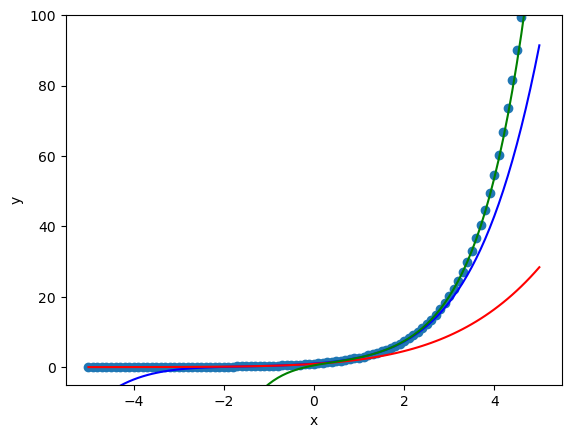

In [16]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

nmax = 5
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'blue')
plt.plot(x_list, expTaylor(x_list, -3, nmax), 'red')
plt.plot(x_list, expTaylor(x_list, 2, nmax), 'green')

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [17]:
def sinTaylor(x, nmax):
    # x: Argument
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
    return t

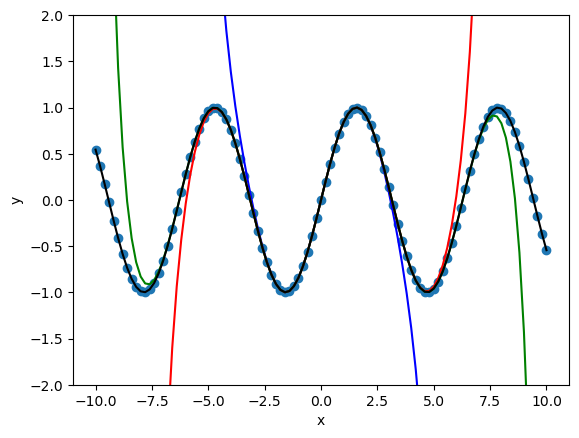

In [18]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3), 'blue')
plt.plot(x_list, sinTaylor(x_list, 6), 'red')
plt.plot(x_list, sinTaylor(x_list, 9), 'green')
plt.plot(x_list, sinTaylor(x_list, 18), 'black')

- Accuracy of \\( \sin(10.5) \\)

In [21]:
np.sin(10.5) - sinTaylor(10.5, 50)

-2.844391389089651e-13

### 1.3 Implementation of a general function

Derivative : \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [22]:
def derivative(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return (f(x+h) - f(x)) / h

In [23]:
def func(x):
    return 2*np.sin(x)**2 + x